In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
raw_data = pd.read_csv('hotel_bookings.csv')
df = raw_data.copy()

## Exploring & Cleaning the data

In [3]:
df.shape

(119390, 32)

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# changing the datatype of the 'reservation_status_date' from object to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%d/%m/%Y')

In [8]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [9]:
for item in df.describe(include = 'object').columns:
    print(item)
    print(df[item].unique())
    print('-'*80)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DO

In [10]:
#lets see if there are any null values in these columns
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# We will remove the agent and company coluns from the dataframe since they do not serve any purpose in data analysis
#Also we will clear all the null values from the country & children column
df = df.drop(['agent','company'], axis =1)
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [14]:
# from the above stastical data of the df we see that there is an outlier of 5400 in 'adr(avg. daily rate)'
# so lets check if there are any other outliers apart from the adr column. 

sorted(df['adr'].unique(), reverse= True)

[5400.0,
 510.0,
 508.0,
 451.5,
 450.0,
 437.0,
 426.25,
 402.0,
 397.38,
 392.0,
 388.0,
 387.0,
 384.0,
 383.0,
 382.0,
 378.0,
 377.0,
 375.5,
 372.71,
 372.33,
 372.0,
 369.0,
 368.1,
 367.0,
 365.0,
 363.0,
 360.0,
 359.5,
 359.0,
 358.75,
 357.0,
 354.0,
 353.67,
 353.0,
 352.5,
 352.0,
 351.0,
 350.75,
 350.2,
 349.67,
 349.63,
 349.0,
 345.0,
 344.67,
 344.0,
 343.0,
 342.29,
 342.17,
 341.0,
 340.86,
 340.71,
 340.0,
 339.4,
 338.0,
 337.0,
 336.57,
 336.5,
 336.0,
 335.0,
 334.43,
 333.67,
 332.57,
 332.0,
 331.43,
 331.33,
 331.0,
 330.57,
 330.0,
 329.67,
 329.0,
 328.67,
 328.33,
 328.0,
 327.6,
 327.4,
 326.71,
 326.5,
 326.33,
 326.0,
 325.0,
 324.5,
 324.0,
 323.0,
 322.0,
 321.94,
 321.5,
 320.7,
 319.0,
 318.82,
 318.71,
 318.5,
 318.0,
 317.67,
 317.5,
 317.0,
 316.5,
 316.0,
 315.71,
 315.5,
 315.38,
 315.33,
 315.0,
 314.67,
 314.5,
 314.1,
 314.0,
 313.71,
 313.67,
 312.5,
 312.29,
 312.0,
 311.7,
 311.6,
 311.5,
 311.33,
 311.25,
 311.0,
 310.75,
 310.2,
 310.0,

In [15]:
# now lets remove the outlier 5400
df = df[df['adr']<5000]

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


## Lets look at the canceled and not canceled reservations 

In [17]:
#here we can see that there is 37% cancellations. Which is quite a high number of cancellations.
df['is_canceled'].value_counts(normalize= True)

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

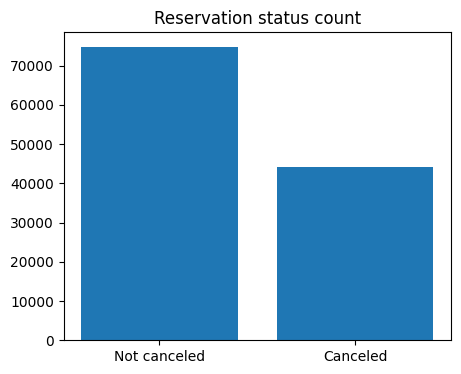

In [18]:
#lets plot a simple bar graph to see this cancellation visually
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled', 'Canceled'],df['is_canceled'].value_counts())
plt.show()

## Now lets find the Reservation status with respect to each hotel.

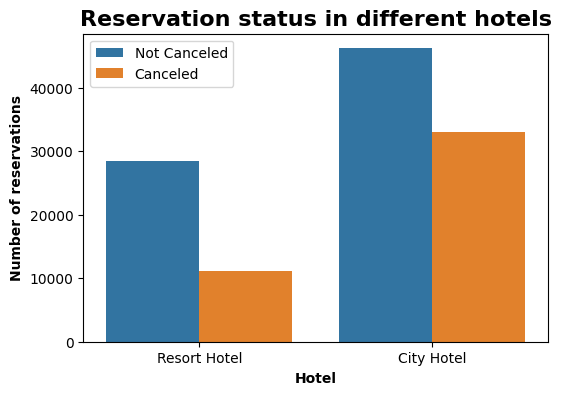

In [19]:
#Based on the above ananlysis we can depict that there are more than 50% of cancellations.
# Let's find out the cancellations based on the hotels. But before that lets explore the total reservations in
# the two hotels

plt.figure(figsize = (6,4))
axes1 = sns.countplot(x= 'hotel', data = df, hue = 'is_canceled')
plt.xlabel('Hotel', weight = 'bold')
plt.ylabel('Number of reservations', weight = 'bold')
plt.title('Reservation status in different hotels', fontsize= 16, weight = 'bold')
axes1.legend(['Not Canceled', 'Canceled'])
plt.show()

## Which hotel has the higher average daily rates?

In [20]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [21]:
resort_hotel = df[df['hotel']== 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize= True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [22]:
city_hotel = df[df['hotel']== 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize= True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [23]:
resort_hotel = resort_hotel.groupby('reservation_status_date')['adr'].mean()
resort_hotel

reservation_status_date
2014-11-18      0.000000
2015-01-01     61.966667
2015-01-02      9.633750
2015-01-18      0.000000
2015-01-21     37.301209
                 ...    
2017-09-08    101.012500
2017-09-09    147.778333
2017-09-10    145.272500
2017-09-12    153.570000
2017-09-14    105.930000
Name: adr, Length: 913, dtype: float64

In [24]:
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

In [25]:
city_hotel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


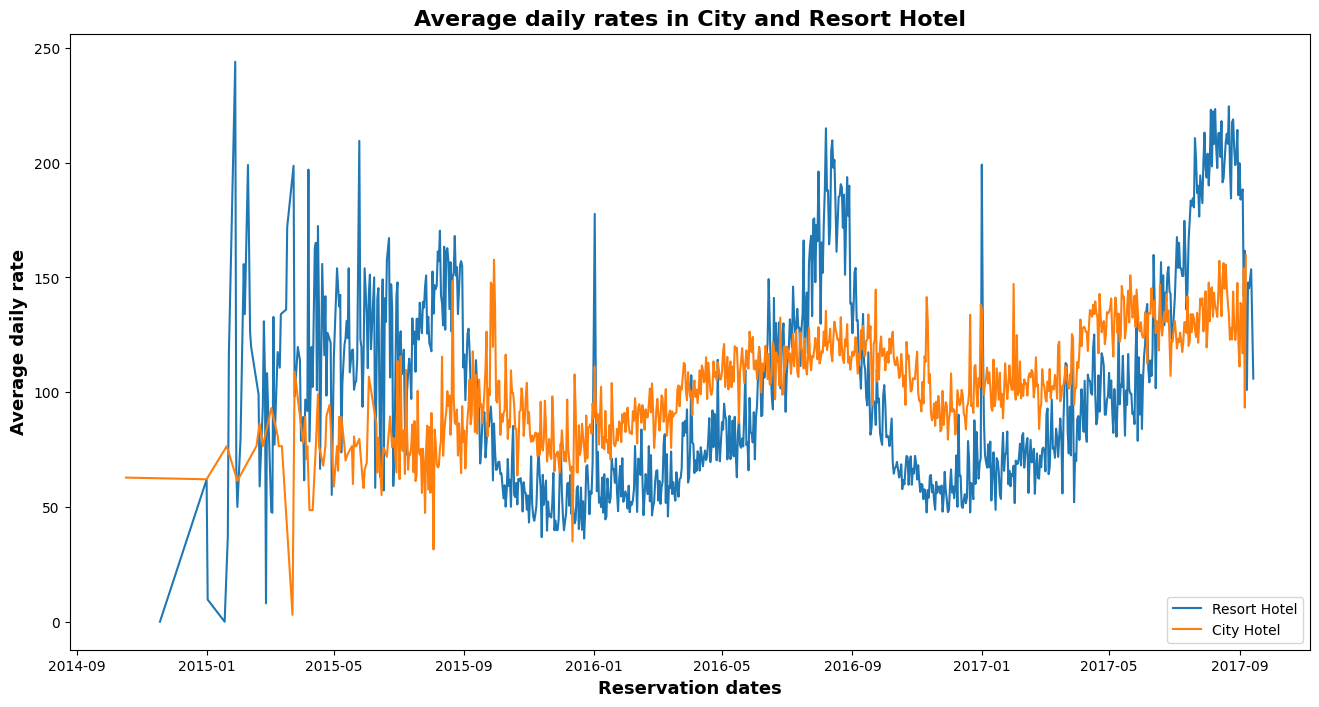

In [26]:
plt.figure(figsize= (16,8))
plt.plot(resort_hotel.index, resort_hotel.values)
plt.plot(city_hotel.index, city_hotel['adr'])
plt.xlabel('Reservation dates', fontsize = 13, weight = 'bold')
plt.ylabel('Average daily rate', fontsize = 13, weight = 'bold')
plt.title('Average daily rates in City and Resort Hotel', fontsize = 16, weight = 'bold')
plt.legend(['Resort Hotel', 'City Hotel'], loc = 'lower right')
plt.show()

## Does higher average daily rates has any impact on the cancellations?

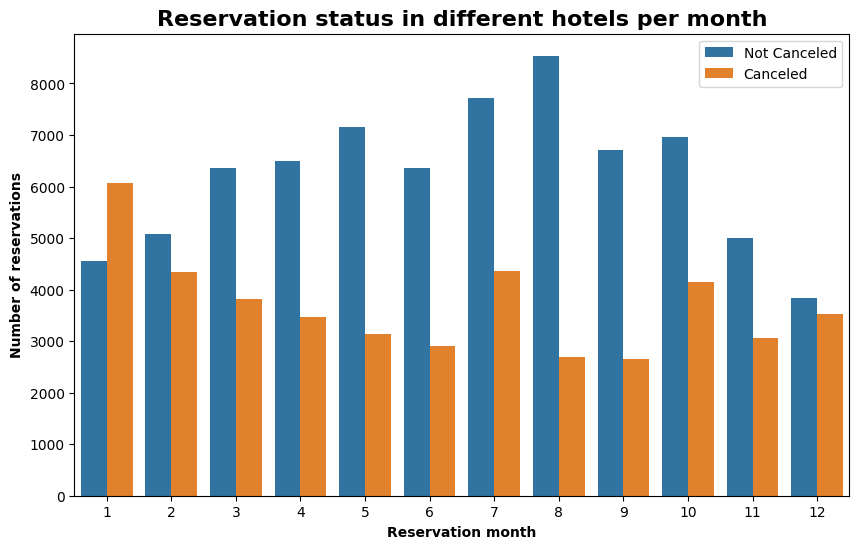

In [27]:
#lets find out the canceled and not canceled bookings with respect to every month

plt.figure(figsize= (10,6))
df['month'] = df['reservation_status_date'].dt.month
axes2 = sns.countplot(x= 'month', data = df, hue = 'is_canceled')
plt.xlabel('Reservation month', weight = 'bold')
plt.ylabel('Number of reservations', weight = 'bold')
plt.title('Reservation status in different hotels per month', fontsize= 16, weight = 'bold')
axes2.legend(['Not Canceled', 'Canceled'])
plt.show()

## ANALYSIS
# From the below chart we can see that August month has the highest amount of bookings with least cancelations
# January has the highest amount of cancellations and the cancellations surpassed the its bookings

In [28]:
#Lets see how many cancellations were made every month based on the hotel adr
df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index()

,month,adr
0,1,571203.57
1,2,447675.76
2,3,424872.56
3,4,425315.23
4,5,391438.08
5,6,359003.34
6,7,481376.17
7,8,325668.43
8,9,274176.33
9,10,330968.87


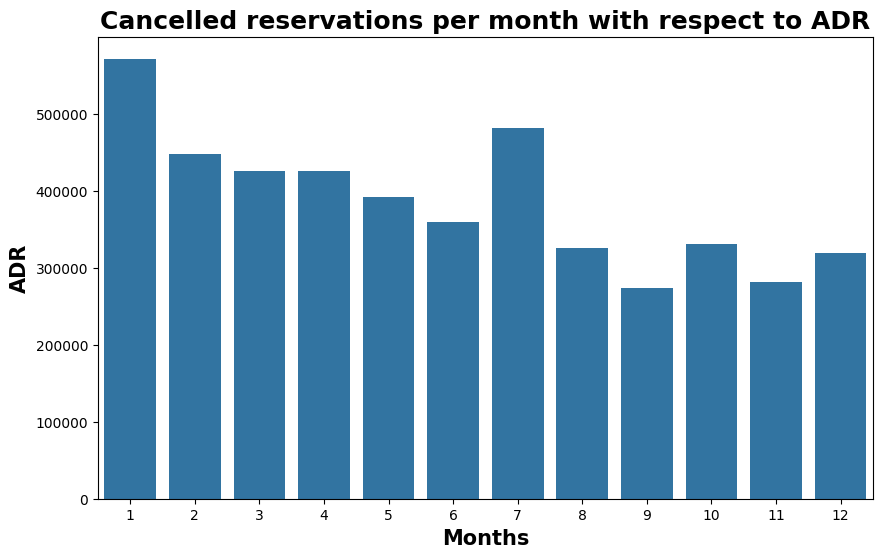

In [29]:
plt.figure(figsize= (10,6))
axes3 = sns.barplot(x= 'month', y= 'adr', data = df[df['is_canceled']==1].groupby('month')[['adr']].sum())
plt.xlabel('Months', fontsize = 15, weight = 'bold')
plt.ylabel('ADR', fontsize = 15, weight = 'bold')
plt.title('Cancelled reservations per month with respect to ADR', fontsize = 18, weight = 'bold')
plt.show()

## ANALYSIS
# From the below plot we can see that the January has the highest ADR when the reservations were canceled
# Therefore, we can interpret that the cancellations are high in January due to the high ADR. 

## Which country has the high cancelations? 

In [30]:
canceled_data = df[df['is_canceled']==1]
top_10_countries = canceled_data['country'].value_counts()[:10]
top_10_countries

country
PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64

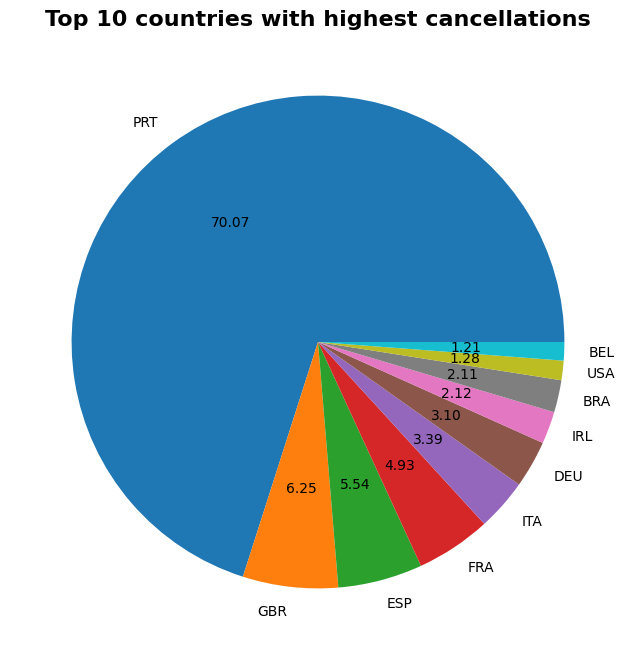

In [31]:
plt.figure(figsize= (8,8))
#plt.bar(top_10_countries.index, top_10_countries.values)
plt.pie(top_10_countries, autopct= '%.2f', labels= top_10_countries.index)
plt.title('Top 10 countries with highest cancellations', fontsize= 16, weight = 'bold')
plt.show()

## ANALYSIS
# We can see that almost 70 percent of the cancellation are coming from the Portugal. 

## From which market segment are the guests making high reservations?

In [32]:
df['market_segment'].value_counts(normalize= True)

#Looking at the market segment it is evident that almost 47% of the customers are making resrvations through online platforms 

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [33]:
canceled_data['market_segment'].value_counts(normalize=True)

# Similarly 47% of the cancellations are from the Online reservations.

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

## What is major factor that contributes to the higher cancellations? 

In [34]:
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.sort_values(by = 'reservation_status_date', inplace= True)
canceled_df_adr

# the above sort_values can also be written as below
# canceled_df_adr = canceled_df_adr.sort_values()

,adr
reservation_status_date,
2014-10-17,62.800000
2014-11-18,0.000000
2015-01-01,62.062779
2015-01-02,9.633750
2015-01-18,0.000000
...,...
2017-08-26,178.200000
2017-08-27,167.300000
2017-08-28,81.416667


In [35]:
not_canceled_data = df[df['is_canceled']==0]
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.sort_values(by = 'reservation_status_date', inplace= True)
not_canceled_df_adr

,adr
reservation_status_date,
2015-07-01,31.650000
2015-07-02,95.924000
2015-07-03,97.645205
2015-07-04,110.480000
2015-07-05,100.308485
...,...
2017-09-08,101.012500
2017-09-09,147.778333
2017-09-10,145.272500


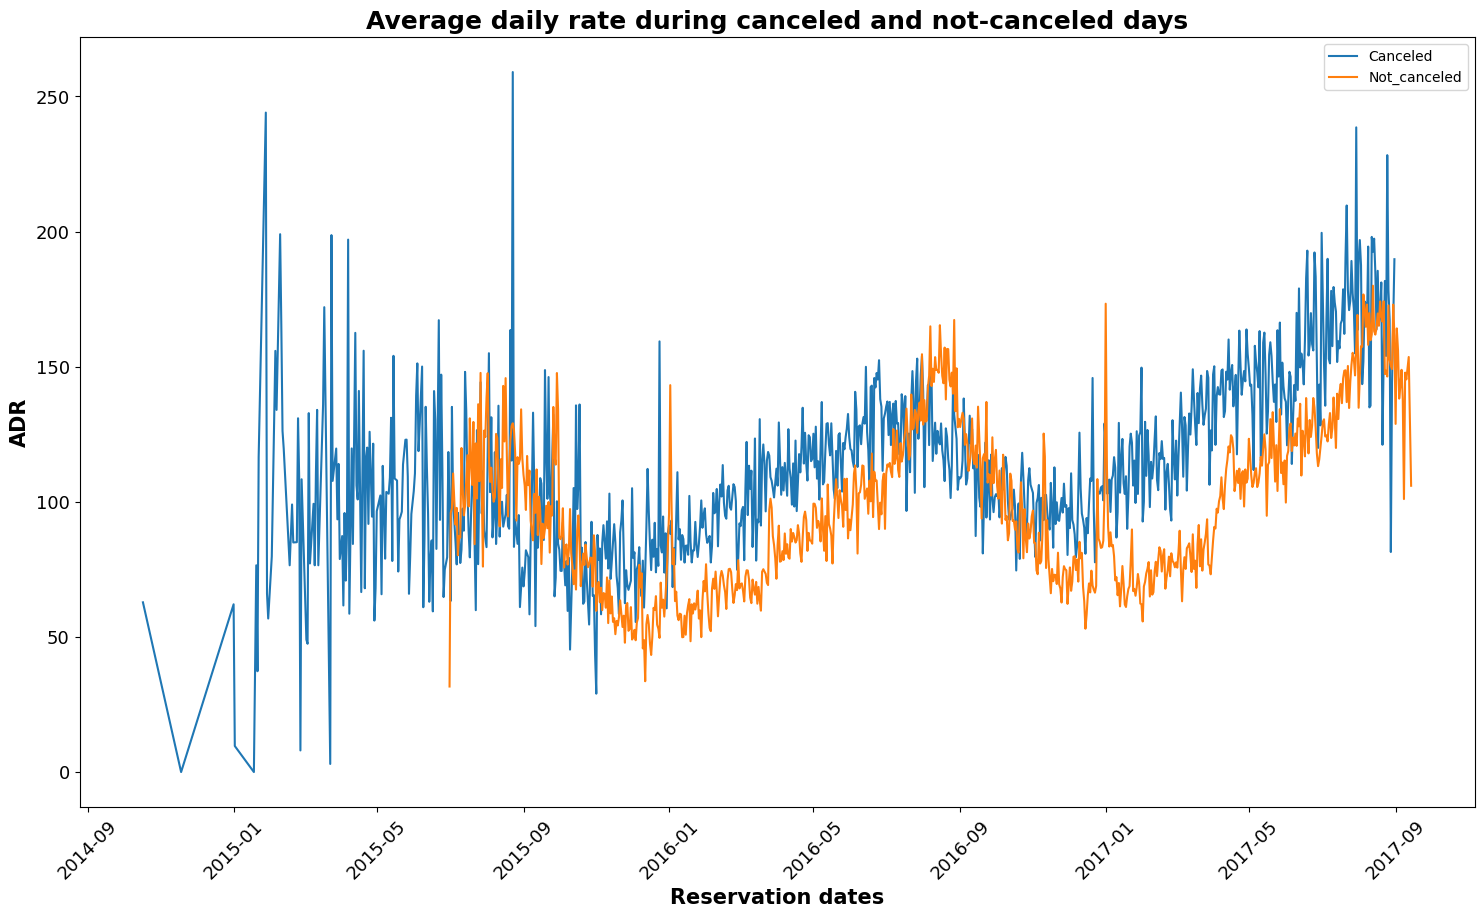

In [36]:
# Now we have the canceled and the not canceled reservations adr with respect to its date.
#Lets plot a line graph and see how the adr is related to the cancellations and non-cancelations. 
plt.figure(figsize = (18,10))
plt.plot(canceled_df_adr.index, canceled_df_adr.values, label = 'Canceled')
plt.plot(not_canceled_df_adr.index, not_canceled_df_adr.values, label = 'Not_canceled')
plt.xlabel('Reservation dates', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('ADR', fontsize = 15, weight = 'bold')
plt.title('Average daily rate during canceled and not-canceled days', fontsize = 18, weight = 'bold')
plt.legend()
plt.show()
#plt.legend(['Canceled', 'Not canceled'])

In [37]:
# From the above graph it is evident that there is no much data regarding the 'not_canceled' data until 2016.
# Therefore to make our analysis more accurate lets take the the data from 01-2016 to 09-2017.

canceled_df_adr = canceled_df_adr[(canceled_df_adr.index> '2016')
                                  &
                                  (canceled_df_adr.index< '2017-09')
                                 ]
not_canceled_df_adr = not_canceled_df_adr[(not_canceled_df_adr.index> '2016')
                                  &
                                  (not_canceled_df_adr.index< '2017-09')
                                 ]

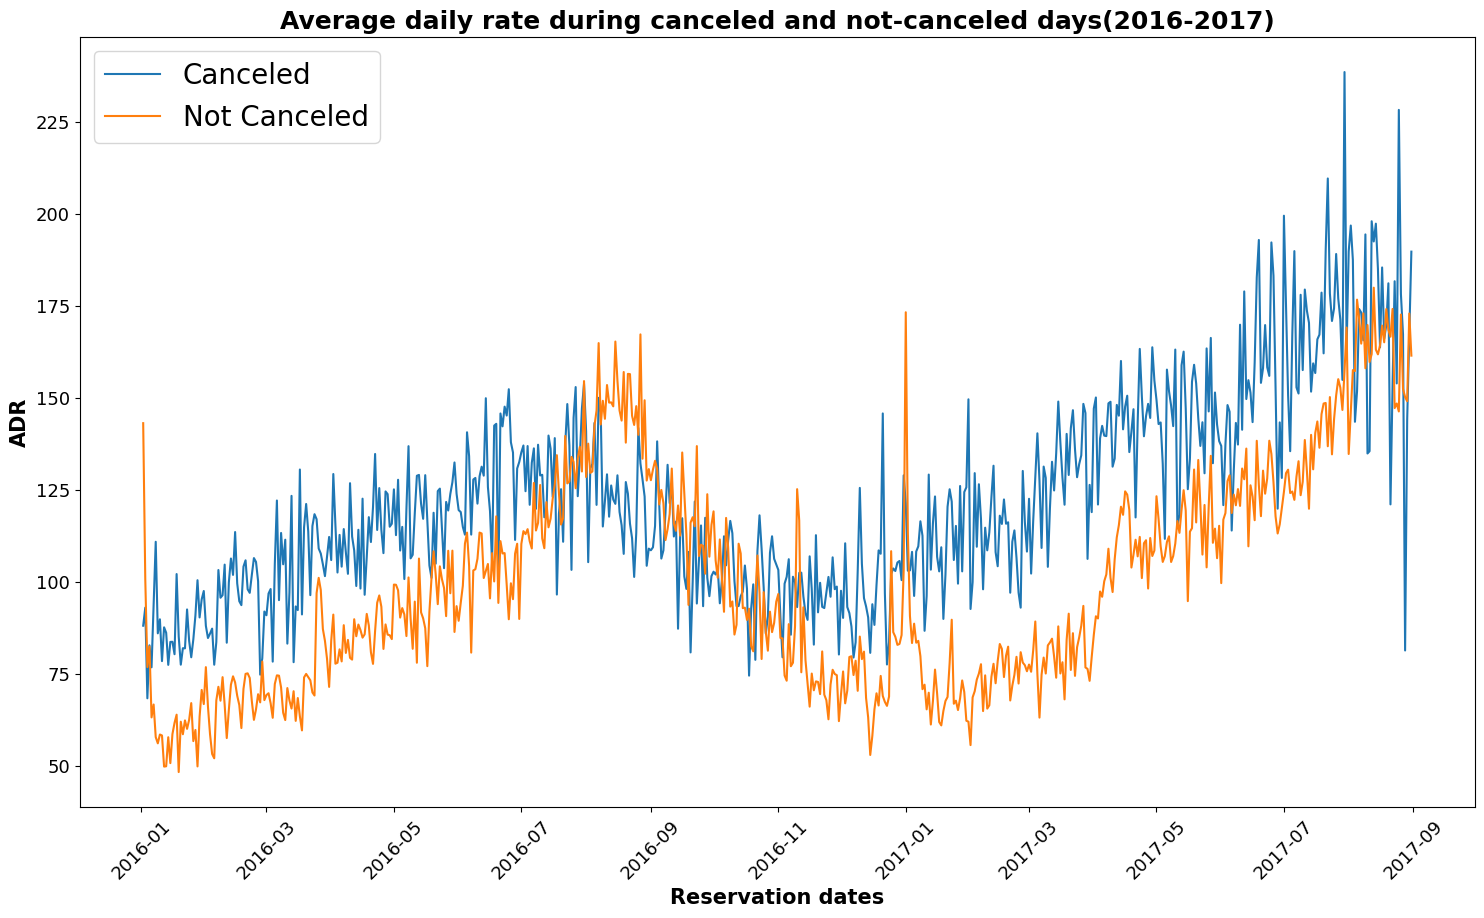

In [38]:
plt.figure(figsize = (18,10))
plt.plot(canceled_df_adr.index, canceled_df_adr.values, label = 'Canceled')
plt.plot(not_canceled_df_adr.index, not_canceled_df_adr.values, label = 'Not Canceled')
plt.xlabel('Reservation dates', fontsize = 15, weight = 'bold')
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('ADR', fontsize = 15, weight = 'bold')
plt.title('Average daily rate during canceled and not-canceled days(2016-2017)', fontsize = 18, weight = 'bold')
plt.legend(fontsize = 20)
plt.show()

In [39]:
# ANALYSIS:
# From the above line graph it is clear that the cancellations are high when the ADR is high. 
# Therefore, we can conclude that the higher daily rates are affecting the cancellations. 
# The spikes that we see in this graph is due to the rise in the price during the weekends and public holidays or special events.